**UID:**


# **Introduction**

This homework is designed to test your understanding of mathematics tutorial discussed in this [link](https://cmsc426.github.io/math-tutorial/), specifically [RANSAC](https://cmsc426.github.io/math-tutorial#ransac). We highly recommend you to read the entire math tutorial, not just the RANSAC section. **The task is to fit the best possible line to two dimensional data points** using linear least square techniques discussed in the tutorial such that the line defines the best possible set of data points:

- Basics of Linear Algebra
- Line fitting using Linear Least Squares
- Outliers rejection using RANSAC



# **Revision: Vectors, Matrices, Eigenvalues, and Eigenvectors (Optional)**

Before we dive into the main tasks, let's quickly revise some key mathematical concepts: vectors, matrices, eigenvalues, and eigenvectors.

**NOTE:** This section is optional and not graded. If you are already familar with the algebra and numpy, you can ignore this step.

### **Given Matrix**

You are provided with the following 2D array (matrix):

$$
A = \begin{pmatrix} 4 & 2 \\ 1 & 3 \end{pmatrix}
$$

### **STEP 1: Calculate Covariance:**
Covariance is a measure of how two variables change together.

To calculate the covariance matrix for a 2D dataset:

1. **Compute the Mean:** Calculate the mean of each variable (column) in the matrix.
2. **Center the Data:** Subtract the mean from each corresponding data point.
3. **Calculate the Covariance Matrix:** Use the formula:

$$
C = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

For a 2D matrix \( A \), the covariance matrix \( C \) is:

$$
C = \begin{pmatrix}
\text{var}(x) & \text{cov}(x, y) \\
\text{cov}(x, y) & \text{var}(y)
\end{pmatrix}
$$

Finally, you can verify the result using NumPy's inbuilt function.

### **Step 2: Calculate Eigenvalues and Eigenvectors**

1. **Find the characteristic equation:**

   1.1 The characteristic equation is given by:

   $$
   \text{det}(A - \lambda I) = 0
   $$

   1.2 Expanding the determinant and simplify

   1.3 Solving the quadratic equation for get eigen values $\lambda$


2. **Find the eigenvectors:**


2.1 For each eigenvalue \( $\lambda_1 $) and ( $\lambda_2 $), substitute back into the equation \( ($A - \lambda I)v = 0 $) to find the corresponding eigenvector \($ v $).



# **What you need to do?  [TOTAL: 75 POINTS]**
The 2D points data is provided in the form of .mat file. The visualization of data with different noise level is shown in the following figure.

In [7]:
import scipy
import gdown
gdown.download_folder(id="1HceecW7W9GGocCrgAC0TNL9_7DrEgfeB", quiet=True, use_cookies=False)

['c:\\Users\\redra\\Documents\\Workspaces\\CMSC426\\data\\data1.mat',
 'c:\\Users\\redra\\Documents\\Workspaces\\CMSC426\\data\\data2.mat',
 'c:\\Users\\redra\\Documents\\Workspaces\\CMSC426\\data\\data3.mat']

In [56]:
data1 = scipy.io.loadmat("C:\\Users\\redra\\Documents\\Workspaces\\CMSC426\\data\\data1.mat")["pts"]
data2 = scipy.io.loadmat("C:\\Users\\redra\\Documents\\Workspaces\\CMSC426\\data\\data2.mat")["pts"]
data3 = scipy.io.loadmat("C:\\Users\\redra\\Documents\\Workspaces\\CMSC426\\data\\data3.mat")["pts"]

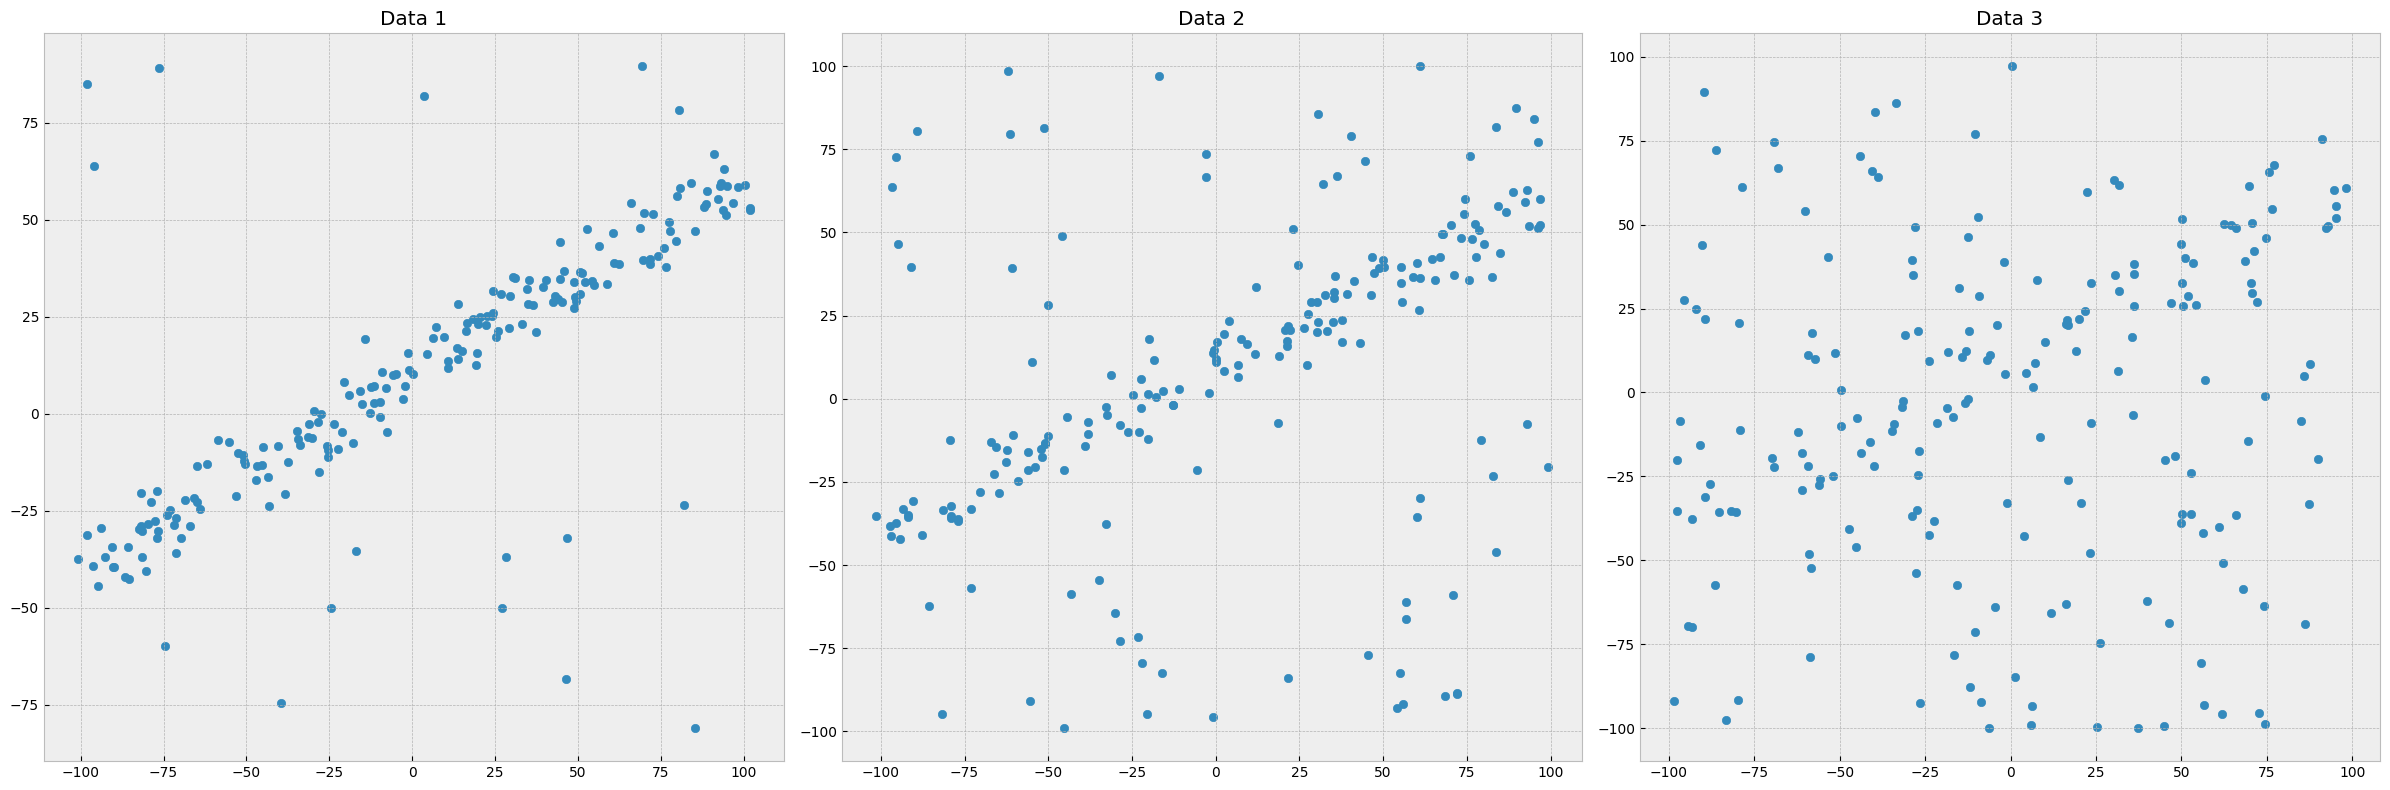

In [57]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use("bmh")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].scatter(data1[0],data1[1])
axes[0].set_title('Data 1')

axes[1].scatter(data2[0],data2[1])
axes[1].set_title('Data 2')

axes[2].scatter(data3[0],data3[1])
axes[2].set_title('Data 3')

plt.tight_layout()
plt.show()

### **STEP 1: Visualize geometric interpretation [20 points]**
Visualize geometric interpretation of eigenvalues/covariance matrix as shown in Fig. 10 of this [link](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)

In [58]:
import numpy as np

def get_eigs(data):
    mean = np.mean(data, axis=1, keepdims=True)
    centered = data - mean
    # Correct covariance calculation: transpose the centered data
    cov = np.cov(centered)
    # Return eigenvalues and eigenvectors
    return np.linalg.eig(cov)

# Calculate eigenvalues and eigenvectors for each dataset
eigvals1, eigvecs1 = get_eigs(data1)
eigvals2, eigvecs2 = get_eigs(data2)
eigvals3, eigvecs3 = get_eigs(data3)

print("Data1 Eigenvectors:\n", eigvecs1, "\nEigenvalues:\n", eigvals1)
print("Data2 Eigenvectors:\n", eigvecs2, "\nEigenvalues:\n", eigvals2)
print("Data3 Eigenvectors:\n", eigvecs3, "\nEigenvalues:\n", eigvals3)


Data1 Eigenvectors:
 [[ 0.89578578 -0.44448604]
 [ 0.44448604  0.89578578]] 
Eigenvalues:
 [4138.24045932  438.60191761]
Data2 Eigenvectors:
 [[ 0.86957598 -0.49379917]
 [ 0.49379917  0.86957598]] 
Eigenvalues:
 [4008.72968704 1587.28715007]
Data3 Eigenvectors:
 [[ 0.93265255 -0.36077585]
 [ 0.36077585  0.93265255]] 
Eigenvalues:
 [3212.27252081 2243.21975848]


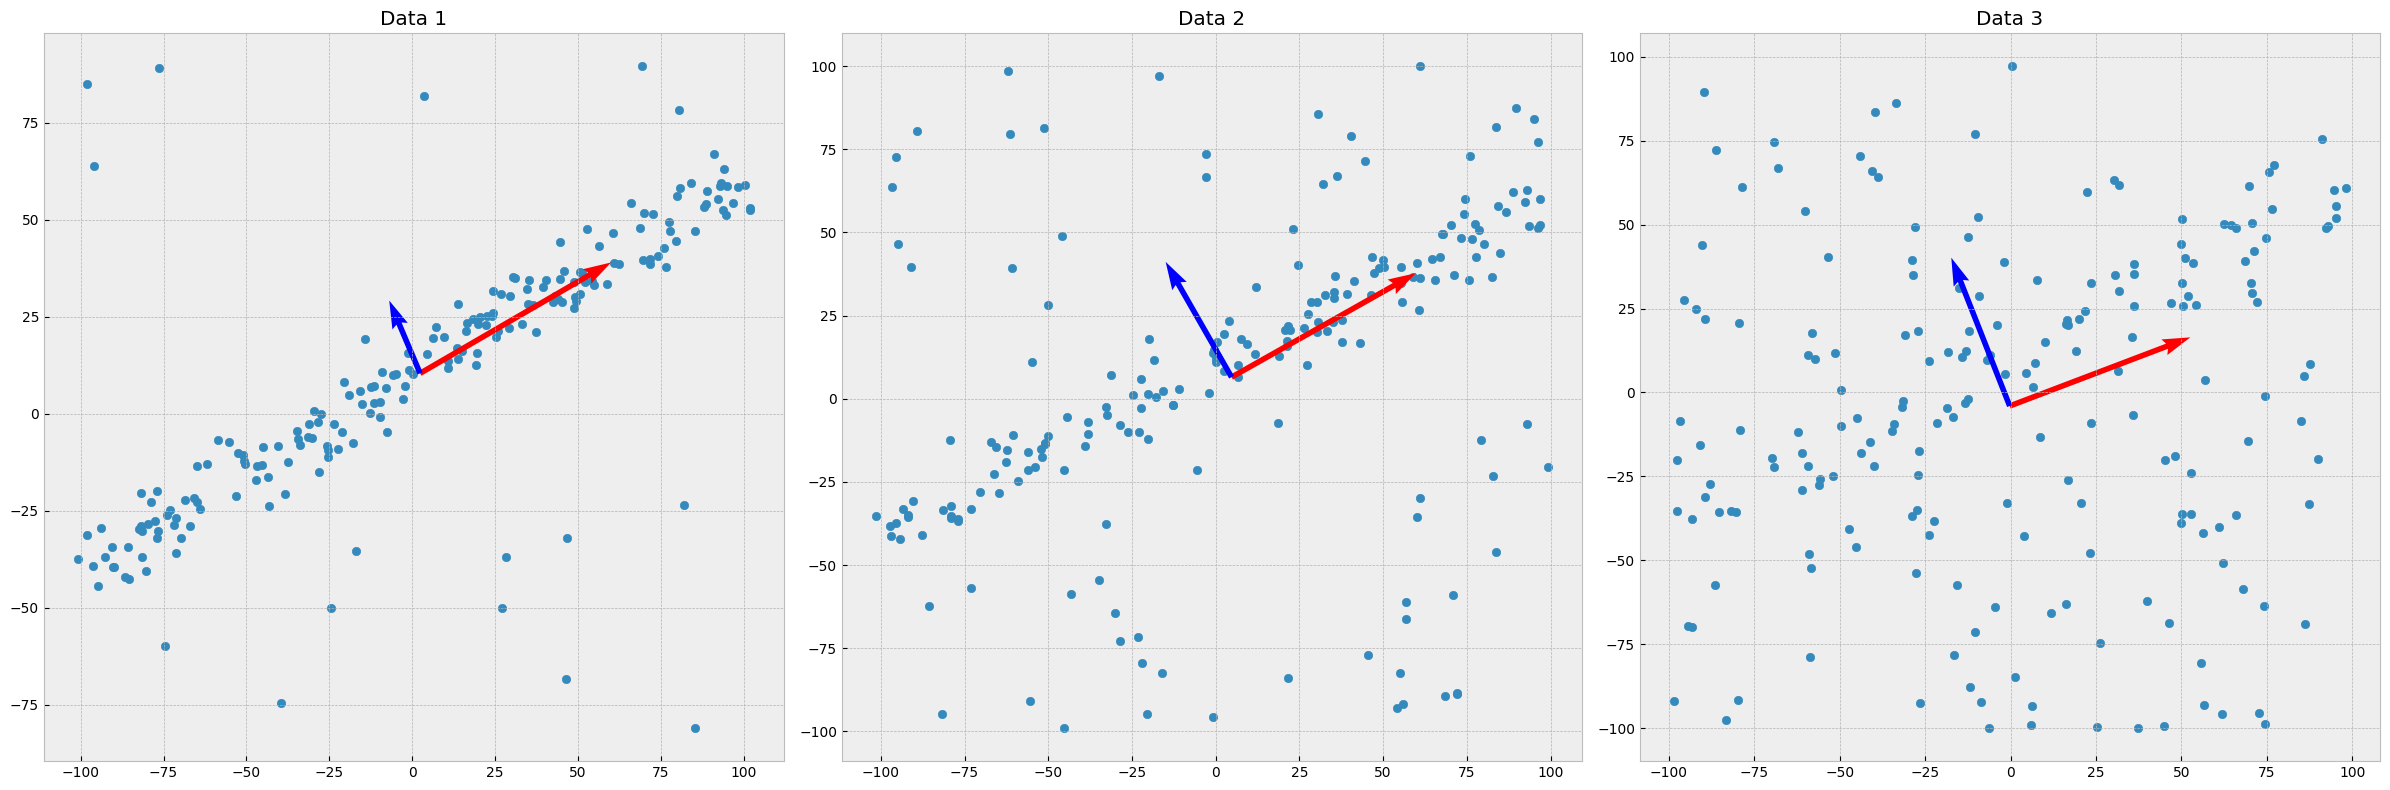

In [66]:
plt.style.use("bmh")

fig, axes = plt.subplots(1, 3, figsize=(24, 8))
axes[0].scatter(data1[0],data1[1])
axes[0].set_title('Data 1')

axes[1].scatter(data2[0],data2[1])
axes[1].set_title('Data 2')

axes[2].scatter(data3[0],data3[1])
axes[2].set_title('Data 3')

origin1 = np.mean(data1, axis=1)
axes[0].quiver(origin1[0], origin1[1], 
               eigvecs1[0, 0] * np.sqrt(eigvals1[0]), eigvecs1[1, 0] * np.sqrt(eigvals1[0]), 
               color='r', angles='xy', scale_units='xy', scale=1)
axes[0].quiver(origin1[0], origin1[1], 
               eigvecs1[0, 1] * np.sqrt(eigvals1[1]), eigvecs1[1, 1] * np.sqrt(eigvals1[1]), 
               color='b', angles='xy', scale_units='xy', scale=1)

# Data 2
origin2 = np.mean(data2, axis=1)
axes[1].quiver(origin2[0], origin2[1], 
               eigvecs2[0, 0] * np.sqrt(eigvals2[0]), eigvecs2[1, 0] * np.sqrt(eigvals2[0]), 
               color='r', angles='xy', scale_units='xy', scale=1)
axes[1].quiver(origin2[0], origin2[1], 
               eigvecs2[0, 1] * np.sqrt(eigvals2[1]), eigvecs2[1, 1] * np.sqrt(eigvals2[1]), 
               color='b', angles='xy', scale_units='xy', scale=1)

# Data 3
origin3 = np.mean(data3, axis=1)
axes[2].quiver(origin3[0], origin3[1], 
               eigvecs3[0, 0] * np.sqrt(eigvals3[0]), eigvecs3[1, 0] * np.sqrt(eigvals3[0]), 
               color='r', angles='xy', scale_units='xy', scale=1)
axes[2].quiver(origin3[0], origin3[1], 
               eigvecs3[0, 1] * np.sqrt(eigvals3[1]), eigvecs3[1, 1] * np.sqrt(eigvals3[1]), 
               color='b', angles='xy', scale_units='xy', scale=1)

plt.tight_layout()
plt.show()

###**STEP 2: RANSAC Implementation [35 points]**

1. **Random Sampling:**
   - Randomly select two data points.

2. **Line Equation:**
   - Calculate the slope \($m$) and intercept \($c$) of the line.


3. **Distance Calculation:**
   - For each data point \((x_i, y_i)\), compute the perpendicular distance to the line:
   - Count the points where this distance is less than a predefined threshold as inliers.

4. **Iteration:**
   - Repeat steps 1-3 for a set number of iterations, keeping track of the line equation with the highest inlier count.

5. **Final Model:**
   - Return the slope and intercept of the line with the most inliers and visualize it.


In [ ]:
def RANSAC(X,Y):
  pass
  #write the function here follwoing the steps above.

###**STEP 3: Final Visualization [20 points]**
Final Visualization

In [ ]:
# Apply RANSAC to all three datasets
datasets = [data1, data2, data3]
titles = ['Data 1', 'Data 2', 'Data 3']
#write your code here

# **Report [TOTAL: 25 POINTS]**
For each section of the homework, below are certain questions to check your understanding.

### **Problem 1: Linear Algebra Concepts** [12 Points]

1) Define Eigenvalues and Eigenvectors? What is the physical  meaning of it? [4 points]

2) What is the least squares method, and why is it important for fitting a line to data in linear regression? [4 points]

3) What is SVD (Singular Value Decomoposition) and its meaning for real-world application? [4 points]


Answers:

### **Problem 2: RANSAC Understanding** [7 points]

1) Discuss a scenario where the RANSAC algorithm might fail or be less effective. How could the algorithm be adjusted or combined with other techniques to mitigate this issue? [5 points]

2) How do the number of iterations and the inlier threshold in RANSAC affect the algorithm’s outcome? [2 points]

### **Problem 3: Null Space, Column Space and Rank of Matrix** [6 POINTS]

1)Define the nullspace, column space, and rank of a matrix. How are these concepts related? [3 points]

2) How does the rank of the matrix relate to its nullspace and column space? [3 points]




# Submission Guidelines

**If your submission does not comply with the following guidelines, you’ll be given ZERO credit.**

Your submission on ELMS(Canvas) must be a pdf file, following the naming convention **YourDirectoryID_proj1.pdf**. For example, xyz123_proj1.pdf.